In [171]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [172]:
book = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
user = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID', 'Location', 'Age']
rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [173]:
print rating['userID'].unique().shape[0]
print rating['ISBN'].unique().shape[0]

105283
340556


In [174]:
print 'Number of unique users is',rating['userID'].unique().shape[0]
print 'Number of unique book is',rating['ISBN'].unique().shape[0]

Number of unique users is 105283
Number of unique book is 340556


In [175]:
# rating['userID'].value_counts()

In [176]:
#check missing value
np.sum(rating.isnull())

userID        0
ISBN          0
bookRating    0
dtype: int64

In [177]:
np.sum(rating.duplicated())

0

In [178]:
rating2=rating.copy()

In [179]:
rating2=rating2[rating2['bookRating']!=0]

In [180]:
rating2.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [181]:
# rating2.groupby('userID')['bookRating'].mean().to_frame()

In [182]:
# rating2=rating2.merge(rating2.groupby('userID')['bookRating'].mean().to_frame().reset_index(),left_index=True,right_index=True,suffixes =['',' user_avg'],how='left')
# rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].mean().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_avg'],how='left')
# rating2=rating2.merge(rating2.groupby('userID')['bookRating'].count().to_frame().reset_index(),left_index=True,right_index=True,suffixes =['',' user_review_count'],how='left')
# rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].count().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_review_count'],how='left')

In [183]:
rating2=rating2.merge(rating2.groupby('userID')['bookRating'].mean().to_frame().reset_index(),left_on='userID',right_on='userID',suffixes =['',' user_avg'],how='left')
rating2=rating2.merge(rating2.groupby('userID')['bookRating'].count().to_frame().reset_index(),left_on='userID',right_on='userID',suffixes =['',' user_review_count'],how='left')

In [184]:
rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].mean().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_avg'],how='left')
rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].count().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_review_count'],how='left')

In [185]:
rating2.shape

(433671, 7)

In [186]:
rating2

,userID,ISBN,bookRating,bookRating user_avg,bookRating user_review_count,bookRating book_avg,bookRating book_review_count
0,276726,0155061224,5,5.000000,1,5.000000,1
1,276729,052165615X,3,4.500000,2,3.000000,1
2,276729,0521795028,6,4.500000,2,6.000000,1
3,276736,3257224281,8,8.000000,1,6.750000,4
4,276737,0600570967,6,6.000000,1,6.000000,1
5,276744,038550120X,7,7.000000,1,7.580247,81
6,276745,342310538,10,10.000000,1,10.000000,1
7,276747,0060517794,9,8.000000,5,8.000000,30
8,276747,0671537458,9,8.000000,5,7.176471,17
9,276747,0679776818,8,8.000000,5,7.476190,21


In [187]:
rating2.rename(columns={'bookRating user_avg':'user_avg'
                        ,'bookRating book_avg':'book_avg'
                       ,'bookRating user_review_count':'user_review_count'
                       ,'bookRating book_review_count':'book_review_count'}, inplace=True)

In [188]:
rating2

,userID,ISBN,bookRating,user_avg,user_review_count,book_avg,book_review_count
0,276726,0155061224,5,5.000000,1,5.000000,1
1,276729,052165615X,3,4.500000,2,3.000000,1
2,276729,0521795028,6,4.500000,2,6.000000,1
3,276736,3257224281,8,8.000000,1,6.750000,4
4,276737,0600570967,6,6.000000,1,6.000000,1
5,276744,038550120X,7,7.000000,1,7.580247,81
6,276745,342310538,10,10.000000,1,10.000000,1
7,276747,0060517794,9,8.000000,5,8.000000,30
8,276747,0671537458,9,8.000000,5,7.176471,17
9,276747,0679776818,8,8.000000,5,7.476190,21


In [189]:
rating2.shape

(433671, 7)

In [190]:
rating.shape

(1149780, 3)

In [191]:
ldf=rating2

In [192]:
ldfu=ldf.groupby('userID')
ldfb=ldf.groupby('ISBN')
user_avg=ldfu.bookRating.mean()
user_review_count=ldfu.userID.count()
book_avg=ldfb.bookRating.mean()
book_review_count=ldfb.ISBN.count()
nldf=ldf.copy()
nldf.set_index(['ISBN'], inplace=True)
nldf['book_avg']=book_avg
nldf['book_review_count']=book_review_count
nldf.reset_index(inplace=True)
nldf.set_index(['userID'], inplace=True)
nldf['user_avg']=user_avg
nldf['user_review_count']=user_review_count
nldf.reset_index(inplace=True)

In [193]:
def recompute_frame(ldf):
    """
    takes a dataframe ldf, makes a copy of it, and returns the copy
    with all averages and review counts recomputed
    this is used when a frame is subsetted.
    """
    ldfu=ldf.groupby('userID')
    ldfb=ldf.groupby('ISBN')
    user_avg=ldfu.bookRating.mean()
    user_review_count=ldfu.userID.count()
    book_avg=ldfb.bookRating.mean()
    book_review_count=ldfb.ISBN.count()
    nldf=ldf.copy()
    nldf.set_index(['ISBN'], inplace=True)
    nldf['book_avg']=book_avg
    nldf['book_review_count']=book_review_count
    nldf.reset_index(inplace=True)
    nldf.set_index(['userID'], inplace=True)
    nldf['user_avg']=user_avg
    nldf['user_review_count']=user_review_count
    nldf.reset_index(inplace=True)
    return nldf

In [194]:
def make_smaller(df, bizcount, usercount):
    smallidf1=df[(df.book_review_count > bizcount)]
    smallidf1=recompute_frame(smallidf1)
    smallidf2=smallidf1[(smallidf1.user_review_count > usercount)]
    smalldf=recompute_frame(smallidf2)
    return smalldf

In [195]:
# rating2[rating2.book_review_count>100]

In [196]:
rating2.shape

(433671, 7)

In [197]:
rating2['user_review_count'].quantile(np.arange(0,1,0.1))

0.0      1.0
0.1      1.0
0.2      4.0
0.3      8.0
0.4     16.0
0.5     29.0
0.6     50.0
0.7     85.0
0.8    153.0
0.9    387.0
Name: user_review_count, dtype: float64

In [198]:
rating2['book_review_count'].quantile(np.arange(0,1,0.1))

0.0     1.0
0.1     1.0
0.2     1.0
0.3     2.0
0.4     2.0
0.5     4.0
0.6     6.0
0.7    12.0
0.8    23.0
0.9    57.0
Name: book_review_count, dtype: float64

In [199]:
rating['userID'].value_counts().quantile(np.arange(0,1,0.1))

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     1.0
0.6     2.0
0.7     3.0
0.8     5.0
0.9    12.0
Name: userID, dtype: float64

In [200]:
rating2.describe()

,userID,bookRating,user_avg,user_review_count,book_avg,book_review_count
count,433671.000000,433671.000000,433671.000000,433671.000000,433671.000000,433671.000000
mean,135458.743451,7.601066,7.601066,352.937160,7.601066,22.363794
std,80678.385078,1.843798,1.179386,1352.150423,1.321068,57.531470
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,66619.000000,7.000000,7.000000,6.000000,7.000000,1.000000
50%,133184.000000,8.000000,7.666667,29.000000,7.750000,4.000000
75%,205735.000000,9.000000,8.356079,115.000000,8.333333,16.000000
max,278854.000000,10.000000,10.000000,8524.000000,10.000000,707.000000


In [201]:
smalldf=make_smaller(rating2, 100, 10)
# smalldf.to_csv("rating2.csv", index=False)
# print "Number of Reviews",smalldf.shape[0]
# print "Number of Users", smalldf.user_id.unique().shape[0]
# print "Number of Businesses", smalldf.business_id.unique().shape[0]
# s,d=compute_supports(smalldf)

In [202]:
smalldf.shape

(2205, 7)

In [203]:
smalldf.head()

,userID,ISBN,bookRating,user_avg,user_review_count,book_avg,book_review_count
0,254,0142001740,9,8.818182,11,8.680000,25
1,254,0380789035,10,8.818182,11,7.888889,9
2,254,0439064864,9,8.818182,11,9.000000,18
3,254,0439064872,9,8.818182,11,8.857143,21
4,254,0439136350,9,8.818182,11,8.944444,18


In [204]:
trainlist=[]
testlist=[]
validatelist=[]
take=5
for k, v in smalldf.groupby('userID'):
    if np.mean(v.user_review_count) > 13:
        takenos=np.random.choice(range(take), size=take/2, replace=False)
        takelist=np.array([e in takenos for e in range(take)])
        validatelist.append(v[-take:][~takelist])#use those 
        testlist.append(v[-take:][takelist])#use the other 
        trainlist.append(v[:-take])
    else:
        trainlist.append(v)
traindf=pd.concat(trainlist)
validatedf=pd.concat(validatelist)
testdf=pd.concat(testlist)
print traindf.shape, validatedf.shape, testdf.shape

(1895, 7) (186, 7) (124, 7)


In [205]:
maskval=[e in set(validatedf.ISBN).difference(set(traindf.ISBN)) for e in validatedf.ISBN] 
masktest=[e in set(testdf.ISBN).difference(set(traindf.ISBN)) for e in testdf.ISBN] 
print np.sum(maskval), np.sum(masktest)

0 0


In [206]:
smalldf.ISBN.value_counts().tail()

0062502182    5
0380731851    5
0380789019    5
0446612545    5
0515131229    2
Name: ISBN, dtype: int64

In [207]:
smalldf.userID.value_counts().tail()

147141    11
160819    11
263325    11
187145    11
214786    11
Name: userID, dtype: int64

In [208]:
ybar = traindf.bookRating.mean()
ybar

8.083377308707124

In [209]:
uuids=traindf.userID.unique()#unique-user-ids
uiids=traindf.ISBN.unique()#unique-item-ids

In [210]:
uuidmap={v:k for k,v in enumerate(uuids)}#of length U
uiidmap={v:k for k,v in enumerate(uiids)}#of length M

In [211]:
def compute_supports(df):
    uuids=df.user_id.unique()
    rests = df.groupby('business_id').user_id.unique()
    bdict={}
    for e,v in zip(rests.index.values, rests.values):
        bdict[e] = np.array([item in v for item in uuids])
    restaurants=bdict.keys()
    supports=[]
    for i,rest1 in enumerate(restaurants):
        for j,rest2 in enumerate(restaurants):
            if  i < j:
                supmask = (bdict[rest1] & bdict[rest2])
                common_reviewers = np.sum(supmask)
                supports.append(common_reviewers)
    print "mean support",np.mean(supports), "median support", np.median(supports)
    return supports, bdict

In [212]:
def user_contrib(uids, trdf):
    return { uid:(trdf[trdf['userID']==uid].bookRating.mean() - ybar) for uid in uids }
def item_contrib(iids, trdf):
    return {iid:(trdf[trdf['ISBN']==iid].bookRating.mean() - ybar) for iid in iids}
user_biases=user_contrib(uuids, traindf)
item_biases=item_contrib(uiids, traindf)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   4.,   1.,   4.,   3.,   0.,   1.,
          3.,   2.,   8.,   4.,   5.,   6.,   6.,   8.,  11.,  10.,   4.,
          6.,   6.,   2.,   3.,   3.,   5.,   2.,  11.,   3.,   1.,   4.,
          4.,   4.,   0.,   0.,   1.,   1.]),
 array([-3.08337731, -2.98337731, -2.88337731, -2.78337731, -2.68337731,
        -2.58337731, -2.48337731, -2.38337731, -2.28337731, -2.18337731,
        -2.08337731, -1.98337731, -1.88337731, -1.78337731, -1.68337731,
        -1.58337731, -1.48337731, -1.38337731, -1.28337731, -1.18337731,
        -1.08337731, -0.98337731, -0.88337731, -0.78337731, -0.68337731,
        -0.58337731, -0.48337731, -0.38337731, -0.28337731, -0.18337731,
        -0.08337731,  0.01662269,  0.11662269,  0.21662269,  0.31662269,
         0.41662269,  0.51662269,  0.61662269,  0.71662269,  0.81662269,
         0.91662269,  1.01662269,  1.11662269,  1.21662269,  1.31662269,
 

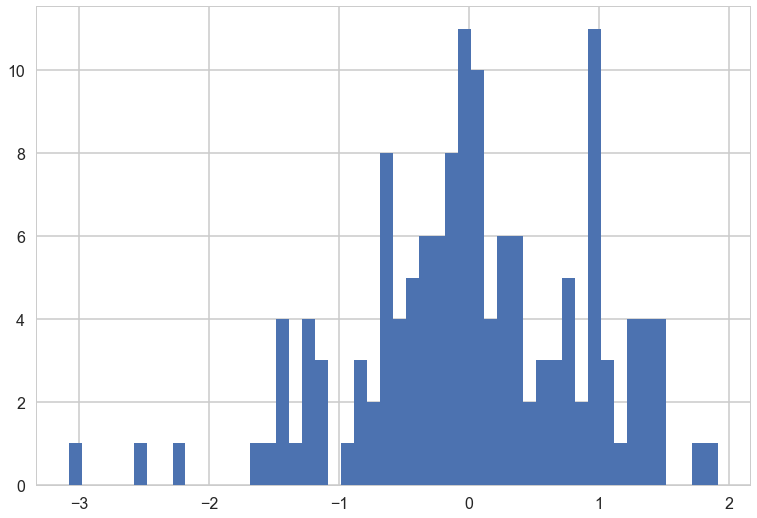

In [213]:
plt.hist(user_biases.values(),bins=50)

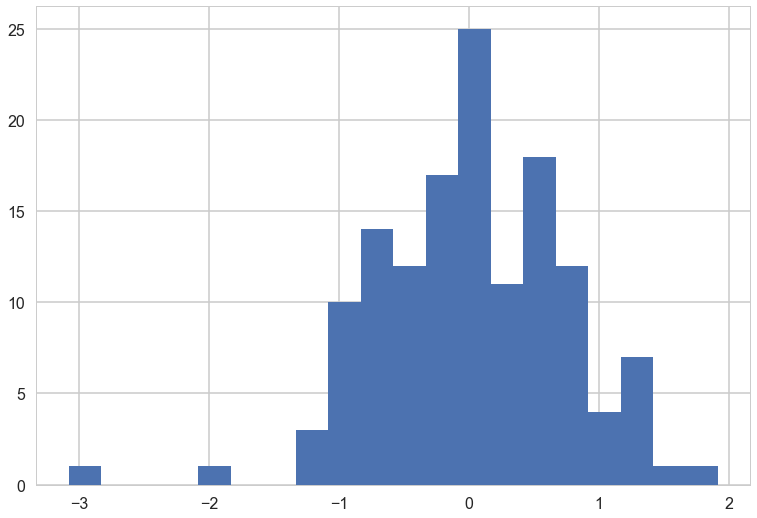

In [214]:
plt.hist(item_biases.values(), bins=20);

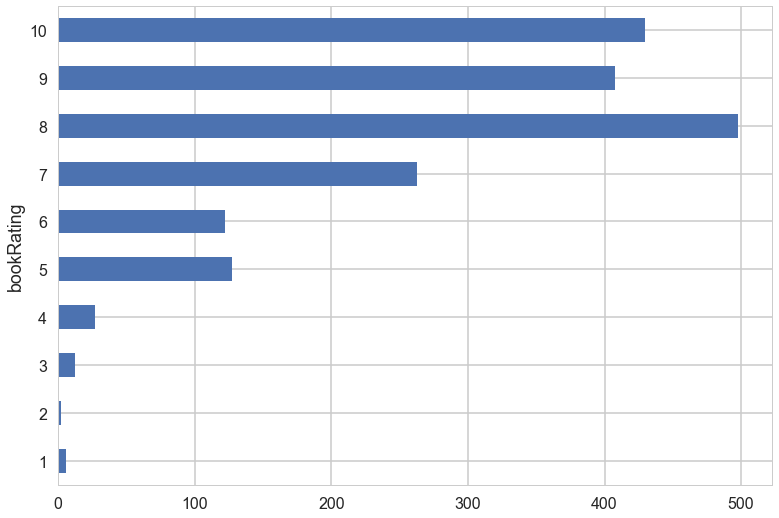

In [215]:
traindf.groupby('bookRating').bookRating.count().plot(kind="barh");

In [216]:
train_avgs={'mean':ybar, 'users':user_biases, 'items':item_biases}

In [217]:
predictions={}
predictions_valid={}

In [218]:
predictions['baseline'] = (ybar + testdf['userID'].apply(lambda x: user_biases[x]) + testdf['ISBN'].apply(lambda x: item_biases[x])).values
predictions_valid['baseline'] = (ybar + validatedf['userID'].apply(lambda x: user_biases[x]) + validatedf['ISBN'].apply(lambda x: item_biases[x])).values

In [219]:
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

In [220]:
def compare_results(stars_actual, stars_predicted, ylow=1, yhigh=10, model="", predicteds=False, onsame=False, axis=False):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    if onsame:
        ax=onsame
    elif axis:
        ax=axis
    else:
        fig=plt.figure()
        ax=plt.gca()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    xp=[]
    yp=[]
    for k,v in df.groupby('actual'):
        xp.append(k)
        yp.append(v.predicted.mean())        
    
    cl, = ax.plot(xp,yp, 's-', label="means for %s" % model)
    c=cl.get_color()

    sig=df.groupby('actual').predicted.std().values
    ax.fill_between(xp, yp - sig, yp + sig, 
                 color=c, alpha=0.2)
    if predicteds:
        ax.plot(df.actual, df.predicted, '.', color=c, alpha=0.1, label="predicted for %s" % model)

    if not onsame:
        ax.plot([1,10],[1,10], 'k', label="slope 1")
        ax.set_xlabel("actual")
        ax.set_ylabel("predicted")
        ax.set_ylim([ylow,yhigh])
        ax.set_xlim([0.9, 10.1])
    ax.legend(frameon=False, loc="upper left")
    rmse=get_rmse(stars_actual, stars_predicted)
    print "RMSE for %s" % model, rmse
    return ax,rmse

RMSE for baseline 1.66532871087


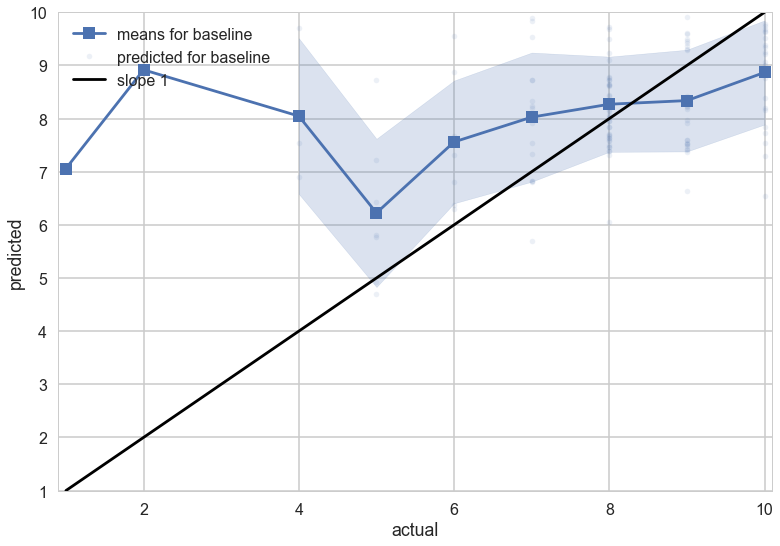

In [221]:
compare_results(testdf.bookRating,predictions['baseline'], model="baseline", predicteds=True);

## Q2 Collaborative Filtering using kNN

Setting up the Collaborative Filtering Model
Can we do a better job of predicting the rating $Y_{um}$ user $u$ would give to restaurant $m$? According to the central dogma of CF, we ought to be able to use the responses of similar users regarding similar restaurants to get a better prediction.

We can make an estimate of $Y_{um}$ as:

$$ \hat{Y_{um}} = \hat Y_{um}^{baseline}\, + \,\frac{\sum\limits_{j \in S^{k}(m)} s_{mj} ( Y_{uj} - \hat Y_{uj}^{baseline} )}{\sum\limits_{j \in S^{k}(m)} s_{mj} } $$
where $S^{k}(m)$ is the $k$ neighbor items of item $m$ based on some pooling criterion, for example, those items which have been rated by user $u$.

To do this, we compute a similarity measure $s_{mj}$ between the $m$th and $j$th items. This similarity might be measured via cosine similarity, pearson co-efficient or using other distance based measures. Here we shall use the Pearson coefficient. This measures the tendency of users to rate items similarly. Since most ratings are unknown, it is computed on the "common user support" (n_common), which is the set of common raters of both items. This is why we spent some time earlier trying to craft a data set which was doable in reasonable time in the context of this homework but still having reasonable values of n_common.

### Global Recommender
$S^{k}(m)$ depends on items only.

Now we have a way to pool information between similar restaurants to try to predict a user's recommendation. But how do we choose the neighborhood to pool over? The simplest choice is to calculate the similarity between items using their entire common user support, and rank the nearest neighbors of an item by this similarity. We call this a "global" recommender because it assumes that every user perceives the similarity between restaurants in the same way. The global recommender does have the advantage of dealing with the possible sparsity of the user's rated items, but also the disadvantage of giving one answer for all users, without taking the user's preferences into account. This is a classic case of bias-variance tradeoff.

The above recommender also has a second problem: we have no way of telling how good our results are. The problem is this:

When I compute the global neighborhood of a restaurant, one of the restaurants in these k nearest neighbors might not have a rating from me in the training set, in the usual training-validation paradigm. So I cant compute that $Y_{uj}$ on the right hand side in the formula above. The best I could do is to use the average rating of restaurant in the training set. I can, of-course, still calculate the nearest neighbors and make recommendations based on the distances I calculate.

We shall not do this recommender here. See HW4 in the 2013 cycle of cs109 for an example of such a recommender. But, you might see such a recommender in the wild: its then a good faith recommender, as it is very hard to validate such a recommender without playing games with averages.

### Local recommender
$S^{k}(m) = S^{k}(m;u)$ depends on items and the user in question

The aim is to get more fine-grained predictions about each user, and try to predict what rating a user would give to a restaurant they have never tried before. To do this, we will try to personalize the information we use even further, and only pool information from restaurants that the user has rated.

This allows us to return to the original problem of prediction $Y_{um}$ for a restaurant $m$ that user $u$ has never rated before. Using our newly computed similarity metrics, we can modify our original baseline estimate by pulling in information from the user's neighborhood of the restaurant $m$, and predict $Y_{um}$ as:

$$ \hat{Y_{um}} = \hat Y^{baseline}_{um}\, + \,\frac{\sum\limits_{j \in S^{k}(m;u)} s_{mj} ( Y_{uj} - \hat Y^{baseline}_{uj} )}{\sum\limits_{j \in S^{k}(m;u)} s_{mj} } $$
where $s^{k}(m;u)$ is the $k$ neighbor items of item $m$ which have been rated by user $u$.

Now, this is not a particularly good assumption, especially in the situation where a restaurant is new (new item problem) or a user is new (cold start problem), or in the case when there are very few reviewers of a restaurant, or very few reviews by a user respectively. However, one must start somewhere!

Notice that in adding in the similarity term, we subtract the baseline estimate from the observed rating of the user's neighbor items.

### Common Support
Lets now make a histogram of the common user support (the number of common reviewers) of each pair of restaurants on the training set, and print the mean. We saw a function do this earlier when we created the smaller data set in smalldf.

The common support is an important concept, as for each pair of restaurants, it is the number of people who reviewed both. It will be used to modify similarity between restaurants. If the common support is low, the similarity is less believable, and we would want to "regularize" it by some average estimate.

In this incarnation we create a two dimensional array supports which uses the uiidmap, and a Pandas Series users_for_restaurants with index the restaurant ids which will come useful later. We obtain the common reviewers as an intersection between two restaurants reviewers. We take care to fill the entire matrix including the diagonal. (This is the second implementation of a support finding routine you have seen: we use set intersections here; earlier we used boolean ANDs on a mask). You will write a third one, soon :-)

Lets now make a histogram of the common user support (the number of common reviewers) of each pair of restaurants on the training set, and print the mean. We saw a function do this earlier when we created the smaller data set in smalldf.

The common support is an important concept, as for each pair of restaurants, it is the number of people who reviewed both. It will be used to modify similarity between restaurants. If the common support is low, the similarity is less believable, and we would want to "regularize" it by some average estimate.

In this incarnation we create a two dimensional array supports which uses the uiidmap, and a Pandas Series users_for_restaurants with index the restaurant ids which will come useful later. We obtain the common reviewers as an intersection between two restaurants reviewers. We take care to fill the entire matrix including the diagonal. (This is the second implementation of a support finding routine you have seen: we use set intersections here; earlier we used boolean ANDs on a mask). You will write a third one, soon :-)

In [222]:
#for each restaurant get the unique userids who rated it
#Generate list of lists which is matrix for users and items.
users_for_restaurants = traindf.groupby('ISBN').userID.unique()
restaurants=uiids
lres=len(restaurants)
supports=[[[] for i in range(lres)] for i in range(lres)]
supporthistlist=[]
for i,rest1 in enumerate(restaurants):
    for j,rest2 in enumerate(restaurants):
        if  i <= j:#its symmetric
            if rest1==rest2:
                common_reviewers=users_for_restaurants[rest1]
            else:
                common_reviewers = set(users_for_restaurants[rest1]).intersection(set(users_for_restaurants[rest2]))
                supporthistlist.append(len(common_reviewers))
            supports[i][j]=common_reviewers
            supports[j][i]=common_reviewers
print "Mean and Median support is:",np.mean(supporthistlist), np.median(supporthistlist)

Mean and Median support is: 1.70319879777 1.0


In [223]:
supports[136][136]

array([187256, 238889, 270713, 271176], dtype=int64)

In [224]:
supports[136][136]

array([187256, 238889, 270713, 271176], dtype=int64)

In [225]:
from scipy.stats.stats import pearsonr
"""
Given a subframe or dictionary of restaurant 1 reviews and a subframe or dictionary of restaurant 2 reviews,
where the reviewers are those who have reviewed both restaurants, return 
the pearson correlation coefficient between the user average subtracted ratings.
The case for zero common reviewers is handled separately. If the correlation is
NaN if any of the individual variances are 0 (the n=1 case), return 0 instead
"""
#your code here
def pearson_sim(rest1_reviews, rest2_reviews, n_common):

    if n_common==0:
        rho=0.
    else:
        diff1=rest1_reviews['bookRating']-rest1_reviews['user_avg']
        diff2=rest2_reviews['bookRating']-rest2_reviews['user_avg']
        rho=pearsonr(diff1, diff2)[0]
        if np.isnan(rho):
            rho=0.
    return rho

In [226]:
def get_restaurant_reviews(restaurant_id, df, set_of_users):
    """
    given a resturant id and a set of reviewers, return the sub-dataframe of their
    reviews.
    """
    mask = (df.userID.isin(set_of_users)) & (df.ISBN==restaurant_id)
    reviews = df[mask]
    reviews = reviews[reviews.userID.duplicated()==False]
    return reviews

In [227]:
class Database:
    "A class representing a database of similarities and common supports"
    
    def __init__(self, rindexmap, supports):
        "the constructor, takes a map of restaurant id's to integers"
        database={}
        self.rindexmap=rindexmap
        self.supports=supports
        l_keys=len(self.rindexmap.keys())
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)

    def set_supports(self, supports):
        self.supports=supports
        
    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.rindexmap[b1]][self.rindexmap[b2]]
        nsup=self.database_sup[self.rindexmap[b1]][self.rindexmap[b2]]
        return (sim, nsup)

In [228]:
db=Database(uiidmap, supports)

In [229]:
print traindf.columns
for row in traindf.head(2).itertuples():
    print row

Index([u'userID', u'ISBN', u'bookRating', u'user_avg', u'user_review_count', u'book_avg', u'book_review_count'], dtype='object')
Pandas(Index=0, userID=254, ISBN=u'0142001740', bookRating=9, user_avg=8.8181818181818183, user_review_count=11, book_avg=8.6799999999999997, book_review_count=25)
Pandas(Index=1, userID=254, ISBN=u'0380789035', bookRating=10, user_avg=8.8181818181818183, user_review_count=11, book_avg=7.8888888888888893, book_review_count=9)


In [230]:
def mapper1(row):
    return row[1], (row[2], row[5], row[14])

In [231]:
# class Salary_calc:
    
#     def __init__(self,number1,number2):
#         self.number1=number1
#         self.number2=number2
#         Salary_calc.base=30
    
#     def add(self):
#         return self.number1+self.number2+Salary_calc.base
    
#     def min(self):
#         return Salary_calc.base-self.number1-self.number2
        

In [232]:
# a0=Salary_calc(2,3)

In [233]:
# a0.add()

In [234]:
# a0.min()

In [235]:
# class Employee:
# # Common base class for all employees
#     empCount = 0

#     def __init__(self, name, salary):
#         self.name = name
#         self.salary = salary
#         Employee.empCount += 1

#     def displayCount(self):
#          print "Total Employee %d" % Employee.empCount

#     def displayEmployee(self):
#          print "Name : ", self.name,  ", Salary: ", self.salary

# "This would create first object of Employee class"
# emp1 = Employee("Zara", 2000)
# "This would create second object of Employee class"
# emp2 = Employee("Manni", 5000)
# emp1.displayEmployee()
# emp2.displayEmployee()

In [236]:
db2=Database( uiidmap, supports)

In [237]:
def calculate_similarity(db, df, rest1, rest2, similarity_func):
    # find common reviewers
    common_reviewers = db.supports[db.rindexmap[rest1]][db.rindexmap[rest2]]
    n_common=len(common_reviewers)
    if rest1==rest2:
        return 1., n_common
    #get reviews
    rest1_reviews = get_restaurant_reviews(rest1, df, common_reviewers)
    rest2_reviews = get_restaurant_reviews(rest2, df, common_reviewers)
    sim=similarity_func(rest1_reviews, rest2_reviews, n_common)
    return sim, n_common

def populate_by_calculating(db, df, similarity_func):
    """
    a populator for every pair of businesses in df. takes similarity_func like
    pearson_sim as argument
    """
    items=db.rindexmap.items()
    for b1, i1 in items:
        for b2, i2 in items:
            if i1 <= i2:
                sim, nsup=calculate_similarity(db, df, b1, b2, similarity_func)
                db.database_sim[i1][i2]=sim
                db.database_sim[i2][i1]=sim
                db.database_sup[i1][i2]=nsup
                db.database_sup[i2][i1]=nsup

In [238]:
%%time
populate_by_calculating(db2, traindf, pearson_sim)

Wall time: 42.1 s


In [239]:
from operator import itemgetter
inventory = [('apple', 3), ('banana', 2), ('pear', 5), ('orange', 1)]
getcount = itemgetter(1)
map(getcount, inventory)

[3, 2, 5, 1]

In [240]:
getcount = itemgetter(0)
map(getcount, inventory)

['apple', 'banana', 'pear', 'orange']

In [241]:
sorted(inventory, key=getcount)

[('apple', 3), ('banana', 2), ('orange', 1), ('pear', 5)]

In [242]:
getcount = itemgetter(1)
map(getcount, inventory)
sorted(inventory, key=getcount)

[('orange', 1), ('banana', 2), ('apple', 3), ('pear', 5)]

In [243]:
def shrunk_sim(sim, n_common, reg=3.):
    "takes a similarity and shrinks it down by using the regularizer"
    ssim=(n_common*sim)/(n_common+reg)
    return ssim

In [244]:
"""
Function
--------
knearest

Parameters
----------
restaurant_id : string
    The id of the restaurant whose nearest neighbors we want
set_of_restaurants : array
    The set of restaurants from which we want to find the nearest neighbors
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businesses. e.g. dbase.get(rid1,rid2)
k : int
    the number of nearest neighbors desired, default 7
reg: float
    the regularization.
    
  
Returns
--------
A sorted list
    of the top k similar restaurants. The list is a list of tuples
    (business_id, shrunken similarity, common support).
"""
from operator import itemgetter
def knearest(restaurant_id, set_of_restaurants, dbase, k=7, reg=3.):
    """
    Given a restaurant_id, dataframe, and database, get a sorted list of the
    k most similar restaurants from the set of restaurants.
    """
    similars=[]
    for other_rest_id in set_of_restaurants:
        if other_rest_id!=restaurant_id:
            sim, nc=dbase.get(restaurant_id, other_rest_id)
            ssim=shrunk_sim(sim, nc, reg=reg)
            simdist=(1. - ssim)/2.
            similars.append((other_rest_id, simdist, nc ))
    similars=sorted(similars, key=itemgetter(1))
    return similars[0:k]

In [245]:
def get_users_restaurants(df, user_id):
    dfuser=df[df.userID==user_id]
    dfuserdedup=dfuser.drop_duplicates('ISBN')
    return dict(zip(dfuserdedup.ISBN.values, dfuserdedup.bookRating.values))

In [246]:
"""
Function
--------
rating

Parameters
----------
set_of_restaurants: Dictionary
    The dictionary of restaurant: star-rating pairs you want to make the prediction from.
    This would be the output of a function like get_users_restaurants
train_map: Dictionary
    A dictionary with keys mean, users and items which have estimates of
    overall average or intercept, user coefficients(averages), and
    item coefficients(averages) respectively
dbase : instance of Database class.
    A database of similarities, on which the get method can be used to get the similarity
  of two businessed. e.g. dbase.get(rid1,rid2)
restaurant_id : string
    The id of the restaurant whose nearest neighbors we want
user_id : string
    The id of the user, in whose reviewed restaurants we want to find the neighbors
k : int
    the number of nearest neighbors desired, default 7
reg: float
    the regularization.
    
  
Returns
--------
A float
    which is the imputed rating that we predict that user_id will make for restaurant_id
    
Notes
--------
If the sum of scores is 0, return the baseline estimate of the ranking.
"""
#your code here
def rating(set_of_restaurants, train_map, dbase, restaurant_id, user_id, k=7, reg=3.):
    mu=train_map['mean']
    restaurant_bias=train_map['items'][restaurant_id]
    user_bias=train_map['users'][user_id]
    
    nsum=0.
    scoresum=0.
    list_of_restaurants=set_of_restaurants.keys()
    nears=knearest(restaurant_id, list_of_restaurants, dbase, k=k, reg=reg)
    scores=[]
    for r,sd,nc in nears:
        s = 1. - sd
        scoresum=scoresum+s
        scores.append(s)
        r_stars=set_of_restaurants[r]
        r_bias=train_map['items'][r]
        rbaseline=(r_bias + user_bias + mu)
        rminusb=(r_stars - rbaseline)
        nsum=nsum+s*rminusb
    baseline=(user_bias +restaurant_bias + mu)
    #we might have nears, but there might be no commons, giving us a pearson of 0
    if scoresum > 0.:
        val =  nsum/scoresum + baseline
    else:#zero yet as sim=0 AND nc=0 is no commons.
        val=baseline
    return val

In [247]:
# testdf[testdf.userID==trainuser]

In [248]:
trainuser=traindf.loc[11].userID
testrest=testdf[testdf.userID==trainuser].ISBN.values[0]
print trainuser, testrest

4017 0671510053


In [249]:
def get_actual(df, userid, bizid):
    return df[(df.userID==userid) & (df.ISBN==bizid)]['bookRating'].values[0]

print "Actual", get_actual(testdf, trainuser, testrest)
print "Predicted",rating(get_users_restaurants(traindf, trainuser), train_avgs, db, testrest, trainuser, k=2, reg=3.)

Actual 10
Predicted 9.61470588235


In [250]:
def get_ratings_user_nbd(indf, traindf, train_map, db, k=2, reg=3.):
    zips=zip(indf.ISBN, indf.userID, indf.bookRating)
    preds=[]
    actuals=[]
    for (r,u,actual) in zips:
        pred=rating(get_users_restaurants(traindf, u),train_map, db, r,u, k, reg)
        preds.append(pred)
        actuals.append(actual)
    return np.array(preds), np.array(actuals)

RMSE for knn(user) on training k=4, reg=4 1.50929938798


(<matplotlib.axes._subplots.AxesSubplot at 0x32ed56d8>, 1.5092993879815066)

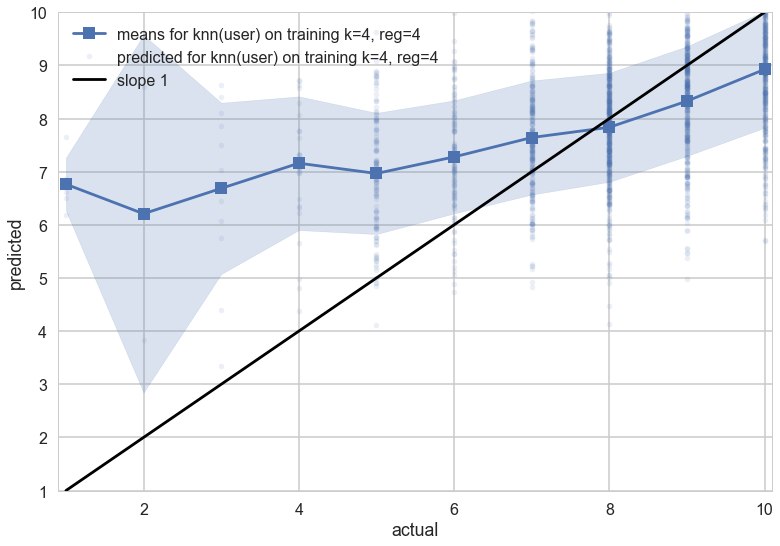

In [251]:
pt, at = get_ratings_user_nbd(traindf, traindf, train_avgs, db, k=4, reg=4.)
compare_results(at,pt, model="knn(user) on training k=4, reg=4", predicteds=True)

In [252]:
rmsedict={}
ks=[5, 10, 20, 28, 30, 32, 35, 50, 100]
regs=[0.5, 1., 3., 5., 10., 20., 50., 100.]
for k in ks:
    for reg in regs:
        p,a=get_ratings_user_nbd(validatedf, traindf, train_avgs, db, k=k, reg=reg)
        rmse=get_rmse(a,p)
        rmsedict[(k,reg)]=rmse
rmsedict

{(5, 0.5): 1.6167897942071823,
 (5, 1.0): 1.6167897942071823,
 (5, 3.0): 1.6167897942071823,
 (5, 5.0): 1.6167897942071823,
 (5, 10.0): 1.6167897942071823,
 (5, 20.0): 1.6167897942071823,
 (5, 50.0): 1.6167897942071823,
 (5, 100.0): 1.6167897942071823,
 (10, 0.5): 1.5606581084518496,
 (10, 1.0): 1.5606581084518496,
 (10, 3.0): 1.5606581084518496,
 (10, 5.0): 1.5606581084518496,
 (10, 10.0): 1.5606581084518496,
 (10, 20.0): 1.5606581084518496,
 (10, 50.0): 1.5606581084518496,
 (10, 100.0): 1.5606581084518496,
 (20, 0.5): 1.5609572585530107,
 (20, 1.0): 1.5609572585530107,
 (20, 3.0): 1.5609572585530107,
 (20, 5.0): 1.5609572585530107,
 (20, 10.0): 1.5609572585530107,
 (20, 20.0): 1.5609572585530107,
 (20, 50.0): 1.5609572585530107,
 (20, 100.0): 1.5609572585530107,
 (28, 0.5): 1.5551021264243099,
 (28, 1.0): 1.5551021264243099,
 (28, 3.0): 1.5551021264243099,
 (28, 5.0): 1.5551021264243099,
 (28, 10.0): 1.5551021264243099,
 (28, 20.0): 1.5551021264243099,
 (28, 50.0): 1.5551021264243099

In [253]:
mintup=min(rmsedict, key=rmsedict.get)
mintup

(100, 3.0)

RMSE for baseline 1.66532871087
RMSE for knn(user) 1.62250164721


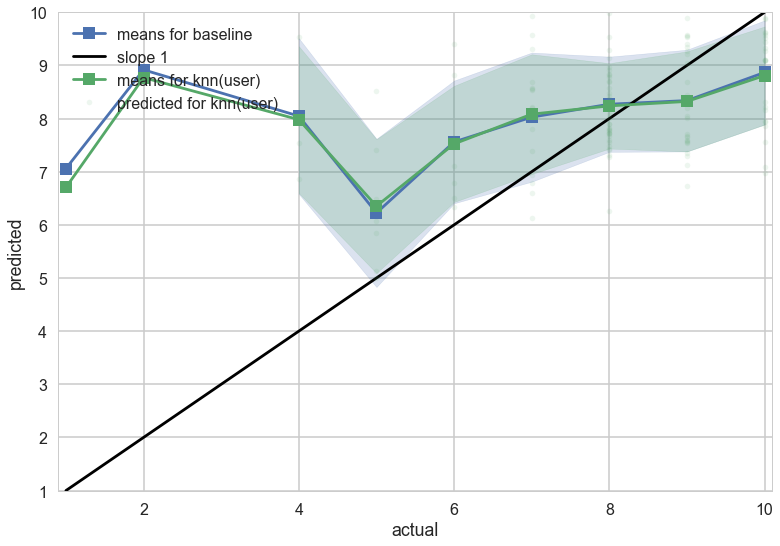

In [254]:
predictions['knn'], atest = get_ratings_user_nbd(testdf, traindf, train_avgs, db, k=mintup[0], reg=mintup[1])
predictions_valid['knn'], _ = get_ratings_user_nbd(validatedf, traindf, train_avgs, db, k=mintup[0], reg=mintup[1])

ax,_=compare_results(atest,predictions['baseline'], model="baseline");
compare_results(atest,predictions['knn'], model="knn(user)", predicteds=True, onsame=ax);

In [255]:
randomuser=np.random.choice(uuids)
randomrest=np.random.choice(uiids)

set_of_restaurants = get_users_restaurants(traindf, randomuser)
tops=knearest(randomrest, set_of_restaurants, db, k=mintup[0], reg=mintup[1])
print "For restaurant",randomrest, " and user", randomuser, ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biz_id, "| Sim", sim, "| Support",nc,"| Actual", get_actual(traindf, randomuser, biz_id)

For restaurant 0345339703  and user 56447 , top matches are:
0 0312278586 | Sim 0.5 | Support 0 | Actual 7
1 0380789035 | Sim 0.5 | Support 0 | Actual 7
2 0060928336 | Sim 0.5 | Support 0 | Actual 8
3 0439064872 | Sim 0.5 | Support 0 | Actual 8
4 0671003755 | Sim 0.5 | Support 0 | Actual 8
5 0140067477 | Sim 0.5 | Support 0 | Actual 8
6 059035342X | Sim 0.5 | Support 0 | Actual 7
7 0842329129 | Sim 0.5 | Support 0 | Actual 6
8 0440219078 | Sim 0.5 | Support 0 | Actual 8
9 0316776963 | Sim 0.5 | Support 0 | Actual 7
10 0316666343 | Sim 0.5 | Support 0 | Actual 8


In [256]:
from sklearn.linear_model import Ridge
features=np.concatenate([uuids,uiids])
features.shape

(278L,)

In [257]:
#your code here#your co 
def getmats(indf):
    stvals=indf[['userID', 'ISBN', 'bookRating']].values
    designm=np.zeros((stvals.shape[0], features.shape[0]))
    ratings=np.zeros(stvals.shape[0])
    for i, row in enumerate(stvals):
        designm[i,:]=np.concatenate([1*(row[0]==uuids), 1*(row[1]==uiids)])
        ratings[i]=row[2]
    return designm, ratings

In [258]:
designm, ratings = getmats(traindf)
# validatedm, validaterats = getmats(validatedf)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


ValueError: all the input arrays must have same number of dimensions

In [ ]:
stvals=traindf[['userID', 'ISBN', 'bookRating']].values
designm=np.zeros((stvals.shape[0], features.shape[0]))
ratings=np.zeros(stvals.shape[0])
for i, row in enumerate(stvals):
    designm[i,:]=np.concatenate([1*(row[0]==uuids), 1*(row[1]==uiids)])
#     ratings[i]=row[2]

In [ ]:
1*(row[0]==uuids)

In [ ]:
1*(row[1]==uiids)

In [ ]:
row[1]

In [ ]:
uiids

In [ ]:
row[0],row[1]